In [1]:
import sys
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

In [4]:
import yolov1
from yolov1.config import parse_config

In [5]:
from yolov1.data.dataset import YOLODataset
from yolov1.utils.vis import draw_boxes_numpy,  draw_boxes_tensor
from yolov1.utils.general import decode_labels

## config

In [6]:
import pprint

In [7]:
def load_config(show=False):
    config_path = "../yolov1/src/yolov1/configs/default.yaml"
    config = parse_config(config_file=config_path)
    if show:
        pprint.pp(config.dict())
    return config

In [8]:
config = load_config()

## dataset

In [79]:
S, B, C = config.model.S, config.model.B, config.model.nc

In [80]:
train_ds = YOLODataset(config, mode="train", encode=True)

/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.venv/lib/python3.9/site-packages/pydantic/main.py:347: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


2024-05-13T14:21:08.418052Z [info     ] Loaded 878 samples             func_name=get_data lineno=64


In [81]:
val_ds = YOLODataset(config, mode="valid", encode=True)

2024-05-13T14:21:09.244375Z [info     ] Loaded 250 samples             func_name=get_data lineno=64


In [234]:
first = train_ds[-10]

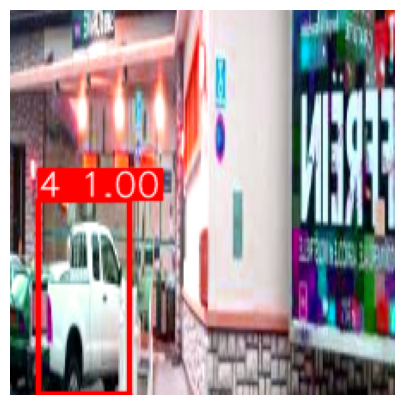

In [235]:
draw_boxes_tensor(first[0], decode_labels(first[1], S, B, C))

In [129]:
len(train_ds[2])

2

In [142]:
sample = train_ds[4]

In [143]:
sample[0].shape

torch.Size([3, 224, 224])

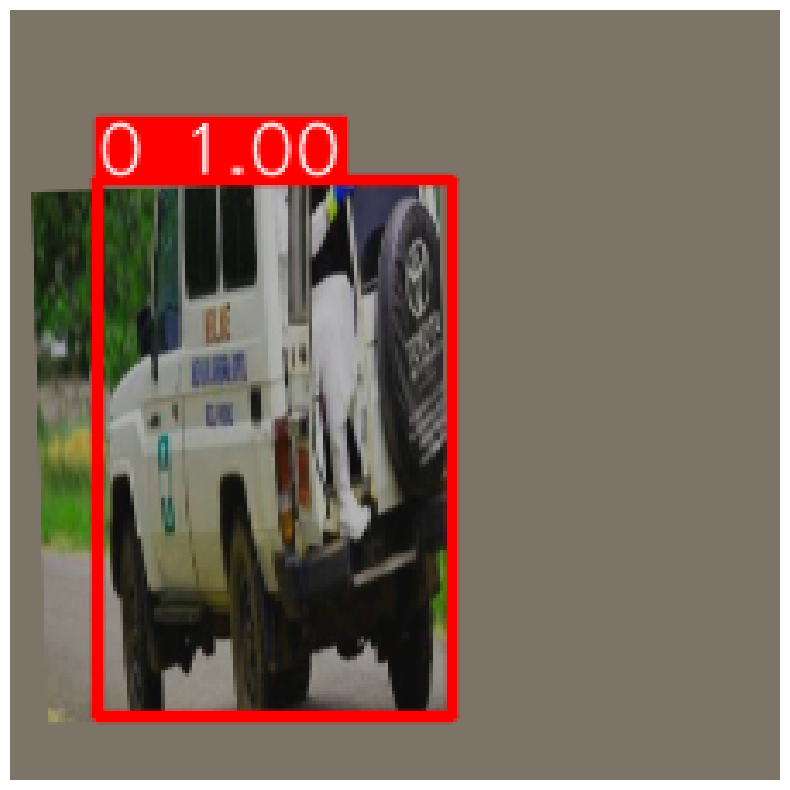

In [144]:
draw_boxes_tensor(
    sample[0],
    decode_labels(sample[1], config.model.S, config.model.B, config.model.nc))

In [95]:
val_ds = YOLODataset(config, mode="val")

2024-05-11T08:33:55.334059Z [info     ] Loaded 250 samples             func_name=get_data lineno=65


## dataloader

In [53]:
from yolov1.data.utils import get_dls

In [54]:
train_dataloader = get_dls(config)

/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.venv/lib/python3.9/site-packages/pydantic/main.py:347: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


2024-05-13T15:15:01.147339Z [info     ] Loaded 878 samples             func_name=get_data lineno=64


## arch

In [12]:
from yolov1.models.arch import YOLOv1

Reloading 'yolov1.models.arch'.


In [16]:
model = YOLOv1(config.model)

Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.


In [17]:
model

YOLOv1(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act1): ReLU(inplace=True)
        (aa): Identity()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [17]:
# model = YOLOv1(config.model)

## train

In [22]:
config = load_config()

Reloading 'yolov1.models.model'.


In [23]:
from yolov1.train import main

In [24]:
main(config)

2024-05-13T16:19:06.479226Z [info     ] Loaded 878 samples             func_name=get_data lineno=64
2024-05-13T16:19:06.488852Z [info     ] Loaded 250 samples             func_name=get_data lineno=64
Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.


INFO: Using 16bit Automatic Mixed Precision (AMP)


Using 16bit Automatic Mixed Precision (AMP)


INFO: GPU available: True (cuda), used: True


GPU available: True (cuda), used: True


INFO: TPU available: False, using: 0 TPU cores


TPU available: False, using: 0 TPU cores


INFO: IPU available: False, using: 0 IPUs


IPU available: False, using: 0 IPUs


INFO: HPU available: False, using: 0 HPUs


HPU available: False, using: 0 HPUs


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


INFO: 
  | Name       | Type                 | Params
----------------------------------------------------
0 | model      | YOLOv1               | 13.0 M
1 | criterion  | SimplifiedYOLOLoss   | 0     
2 | map_metric | MeanAveragePrecision | 0     
----------------------------------------------------
1.8 M     Trainable params
11.2 M    Non-trainable params
13.0 M    Total params
51.880    Total estimated model params size (MB)



  | Name       | Type                 | Params
----------------------------------------------------
0 | model      | YOLOv1               | 13.0 M
1 | criterion  | SimplifiedYOLOLoss   | 0     
2 | map_metric | MeanAveragePrecision | 0     
----------------------------------------------------
1.8 M     Trainable params
11.2 M    Non-trainable params
13.0 M    Total params
51.880    Total estimated model params size (MB)


Sanity Checking: |                                                                                            …

torch.Size([1568, 7]) torch.Size([54, 7])


ValueError: Input 'boxes' and labels of sample 0 in targets have a different length (expected 54 labels, got 1568)

In [16]:
MeanAveragePrecision?

Init signature:
MeanAveragePrecision(
    box_format: typing_extensions.Literal['xyxy', 'xywh', 'cxcywh'] = 'xyxy',
    iou_type: Union[typing_extensions.Literal['bbox', 'segm'], Tuple[str]] = 'bbox',
    iou_thresholds: Optional[List[float]] = None,
    rec_thresholds: Optional[List[float]] = None,
    max_detection_thresholds: Optional[List[int]] = None,
    class_metrics: bool = False,
    extended_summary: bool = False,
    average: typing_extensions.Literal['macro', 'micro'] = 'macro',
    backend: typing_extensions.Literal['pycocotools', 'faster_coco_eval'] = 'pycocotools',
    **kwargs: Any,
) -> None
Docstring:     
Compute the `Mean-Average-Precision (mAP) and Mean-Average-Recall (mAR)`_ for object detection predictions.

.. math::
    \text{mAP} = \frac{1}{n} \sum_{i=1}^{n} AP_i

where :math:`AP_i` is the average precision for class :math:`i` and :math:`n` is the number of classes. The average
precision is defined as the area under the precision-recall curve. For object detec

## infer

In [12]:
from yolov1.detect import main as detect_main
from yolov1.data.dataset import InferenceDataset
from yolov1.data.utils import get_dls_for_inference

In [44]:
config.inference.source = '/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data/test/images'

In [36]:
config.inference.checkpoint = '/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints/epoch_epoch=149-v1.ckpt'

In [37]:
config.inference.conf_th = 0.5

In [38]:
for idx, res in enumerate(detect_main(config)):
    if idx == 20:
        break

Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2024-05-13T12:48:08.708621Z [info     ] Model loaded successfully      func_name=main lineno=65


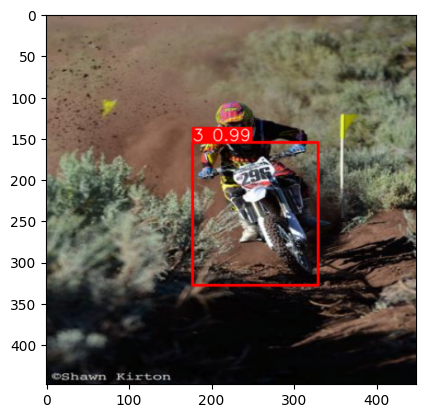

In [43]:
plt.imshow(res["drawn"][3])